In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
from random import random

In [2]:
class MultivarNorm:
    def __init__(self, means, covMatr):
        self.mu = np.array(means).reshape((len(means), 1))
        self.sigma = np.array(covMatr)
        self.d = len(means)        
        self.A = np.array([])
        u, V = np.linalg.eig(self.sigma)
        if (u[0] / u[-1] > 10**-10):
            self.A = np.linalg.cholesky(self.sigma) 
        else:    
            self.A = np.dot(V, np.diag(np.sqrt(u)))
            
    def sample(self, N):
        eta = np.random.normal(0, 1, self.d * N).reshape(self.d, N) 
        ans = self.mu + np.dot(self.A, eta)
        return ans


Covariance matrix:
 [[1.02160317 2.04320634]
 [2.04320634 4.08641268]]


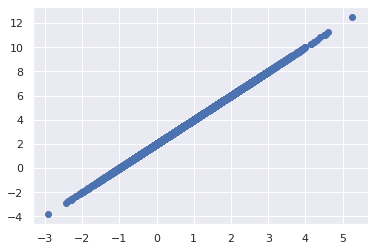

In [3]:
#Singular matrix, dim = 2
mu = [1, 4]
A = [[1, 2], 
     [2, 4]]
x = MultivarNorm(mu, A).sample(10000)
#sns.jointplot(x=x[0], y=x[1], kind="kde", space=0);
plt.plot(x[0], x[1], 'o')
print('Covariance matrix:\n', np.cov(x))

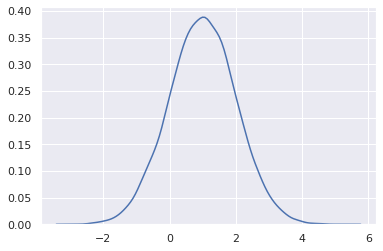

In [4]:
sns.distplot(x[0], hist = False)

Covariance matrix:
 [[2.00505966 1.01095971]
 [1.01095971 2.02585358]]


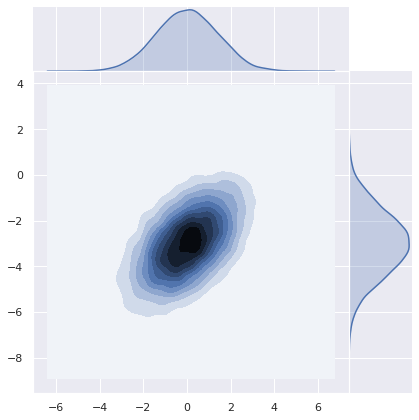

In [6]:
mu2 = [0, -3]
A2 = [[2, 1], [1, 2]]
x2 = MultivarNorm(mu2, A2).sample(20000)
sns.jointplot(x = x2[0], y = x2[1], kind = 'kde', space = 0)
print('Covariance matrix:\n', np.cov(x2))

In [9]:
dim = 4
A3 = np.array([random() * 2 for _ in range(16)]).reshape((4, 4))
A3 = np.dot(A3, np.transpose(A3))
mu3 = np.array([random() * 4 for _ in range(4)])
print('Mu:\n', mu3)
print('Covariance matrix:\n', A3)

Mu:
 [2.60687608 1.48418158 0.99465799 0.02521296]
Covariance matrix:
 [[6.47892003 5.43080804 4.54088418 2.85860597]
 [5.43080804 4.77929621 3.59880798 2.50556419]
 [4.54088418 3.59880798 7.34291923 3.85927391]
 [2.85860597 2.50556419 3.85927391 2.66604079]]


In [10]:
x3 = MultivarNorm(mu3, A3).sample(10000)

In [11]:
#Difference between covariance matrix and emperical covariance matrix
np.cov(x3) - A3

array([[ 0.04379969,  0.0517303 , -0.02453848,  0.021839  ],
       [ 0.0517303 ,  0.05734197, -0.00697488,  0.02982393],
       [-0.02453848, -0.00697488, -0.01251944,  0.02741973],
       [ 0.021839  ,  0.02982393,  0.02741973,  0.03877679]])

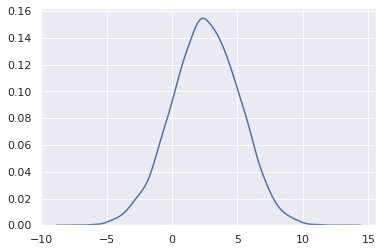

In [12]:
sns.distplot(x3[0], hist = False)

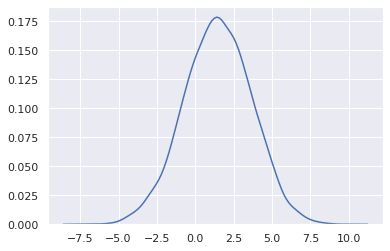

In [13]:
sns.distplot(x3[1], hist = False)

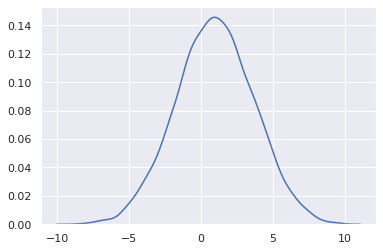

In [14]:
sns.distplot(x3[2], hist = False)

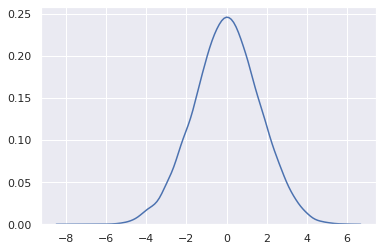

In [15]:
sns.distplot(x3[3], hist = False)